<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW/My_Solutions/CIFAR10_Architecture_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Third CNN with Data Augmentation and Dropout**



1.   Conv2D + Relu + Conv2D + Relu + Maxpool
2.   Conv2D + Relu + Conv2D + Relu + Maxpool
3.   Dense
4.   Data augmentation + Dropout



**Loading the CIFAR10 data**

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

**Preparing data**

Training/Validation 80%/20%


In [79]:
import sklearn.model_selection as skl 

train_images, val_images, train_labels, val_labels = skl.train_test_split(train_images, train_labels, test_size=0.20)

print("train images",train_images.shape)
print("val images",val_images.shape)

train images (40000, 32, 32, 3)
val images (10000, 32, 32, 3)


**Preprocessing the data**

In [0]:
from keras.utils import to_categorical

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

**The Architecture**

In [81]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 6400)              0         
__________

**Compiling the model**

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

**Data Augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(train_images)

**Training**

In [84]:
history = model.fit_generator(datagen.flow(train_images, 
                                           train_labels, 
                                           batch_size=40),
                                           epochs=10,
                                           steps_per_epoch=1000,
                                           validation_data=(val_images, val_labels),
                                           validation_steps=250)

Epoch 1/10
1000/1000 [==============================] - 453s 453ms/step - loss: 1.7489 - acc: 0.3680 - val_loss: 1.4295 - val_acc: 0.4839
Epoch 2/10
1000/1000 [==============================] - 453s 453ms/step - loss: 1.4344 - acc: 0.4977 - val_loss: 1.3010 - val_acc: 0.5758
Epoch 3/10
1000/1000 [==============================] - 451s 451ms/step - loss: 1.3347 - acc: 0.5382 - val_loss: 1.1873 - val_acc: 0.5953
Epoch 4/10
1000/1000 [==============================] - 451s 451ms/step - loss: 1.2991 - acc: 0.5572 - val_loss: 1.0461 - val_acc: 0.6389
Epoch 5/10
1000/1000 [==============================] - 457s 457ms/step - loss: 1.2761 - acc: 0.5680 - val_loss: 1.1863 - val_acc: 0.5806
Epoch 6/10
1000/1000 [==============================] - 453s 453ms/step - loss: 1.2742 - acc: 0.5707 - val_loss: 1.3735 - val_acc: 0.5112
Epoch 7/10
1000/1000 [==============================] - 452s 452ms/step - loss: 1.2617 - acc: 0.5769 - val_loss: 1.0414 - val_acc: 0.6364
Epoch 8/10
1000/1000 [============

**Plotting loss and accuracy**

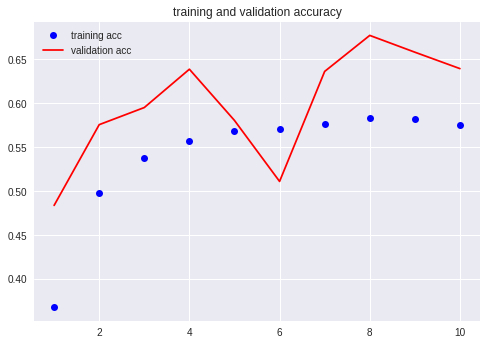

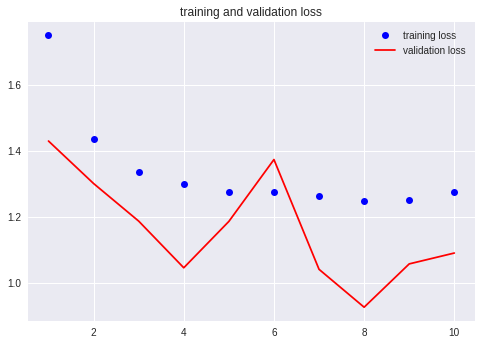

In [87]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

**Evaluate the model**

In [88]:

score = model.evaluate(val_images, val_labels, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1]*100,"%")

Validation loss: 1.090704738330841
Validation accuracy: 63.959999999999994 %
